## Observations and Insights 

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
Mouse_df = pd.merge(mouse_metadata, study_results, on= "Mouse ID", how = "left")

# Display the data table for preview
Mouse_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [3]:
# Checking the number of mice.
Mouse_df["Mouse ID"].count()

1893

In [4]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
Duplicate_data = Mouse_df[Mouse_df.duplicated(["Mouse ID" , "Timepoint"])]
Duplicate_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
# Optional: Get all the data for the duplicate mouse ID. 
Duplicate_data['Mouse ID'].unique()
Mouse_df.loc[Mouse_df["Mouse ID"] == "g989"]

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [6]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
Cleaned_Mouse_df = Mouse_df.loc[Mouse_df['Mouse ID'] != 'g989']
Cleaned_Mouse_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [7]:
# Checking the number of mice in the clean DataFrame.
len(Cleaned_Mouse_df["Mouse ID"].unique())

248

## Summary Statistics

In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method is the most straighforward, creating multiple series and putting them all together at the end.
Group = Cleaned_Mouse_df.groupby("Drug Regimen")
Mean = Group["Tumor Volume (mm3)"].mean()
Median = Group["Tumor Volume (mm3)"].median()
Standard = Group["Tumor Volume (mm3)"].std()
Variance = Group["Tumor Volume (mm3)"].var()
Mean_st = pd.DataFrame(Mean)
Mean_st.columns = ["Mean Tumor Volume"]
Median_st = pd.DataFrame(Median)
Median_st.columns = ["Median Tumor Volume"]
Standard_st = pd.DataFrame(Standard)
Standard_st.columns = ["Tumor Volume Standard Deviation"]
Variance_st = pd.DataFrame(Variance)
Variance_st.columns = ["Tumor Volume Variance"]

Statistics = Mean_st.copy() 
Statistics["Median Tumor Volume"] = Median_st["Median Tumor Volume"]
Statistics["Tumor Volume Standard Deviation"] = Standard_st["Tumor Volume Standard Deviation"]
Statistics["Tumor Volume Variance"] = Variance_st["Tumor Volume Variance"]                                              
Statistics = Statistics.reset_index()
Statistics

,Drug Regimen,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Standard Deviation,Tumor Volume Variance
0,Capomulin,40.675741,41.557809,4.994774,24.947764
1,Ceftamin,52.591172,51.776157,6.268188,39.290177
2,Infubinol,52.884795,51.820584,6.567243,43.128684
3,Ketapril,55.235638,53.698743,8.279709,68.553577
4,Naftisol,54.331565,52.509285,8.134708,66.173479
5,Placebo,54.033581,52.288934,7.821003,61.168083
6,Propriva,52.320930,50.446266,6.622085,43.852013
7,Ramicane,40.216745,40.673236,4.846308,23.486704
8,Stelasyn,54.233149,52.431737,7.710419,59.450562
9,Zoniferol,53.236507,51.818479,6.966589,48.533355


In [9]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method produces everything in a single groupby function


## Bar and Pie Charts

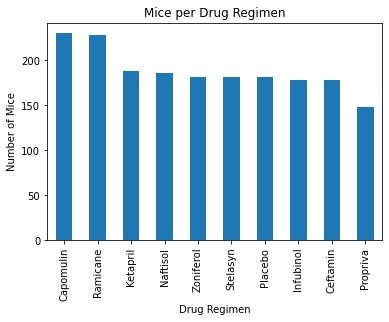

In [10]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 
Time_Ref = Cleaned_Mouse_df.groupby("Drug Regimen")
Time_Ref_Count = Time_Ref["Mouse ID"].count()
Order = Time_Ref_Count.sort_values(ascending = False)
Mice_Chart = Order.plot(kind = "bar", title = "Mice per Drug Regimen")
Mice_Chart.set_xlabel("Drug Regimen")
Mice_Chart.set_ylabel("Number of Mice")
plt.show()

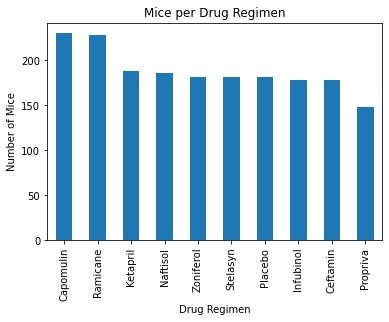

In [11]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.
Count_Mice = Time_Ref["Mouse ID"].count()
Order = Count_Mice.sort_values(ascending = False)
Order.plot(kind = "bar")

plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice")
plt.title("Mice per Drug Regimen")
plt.show()

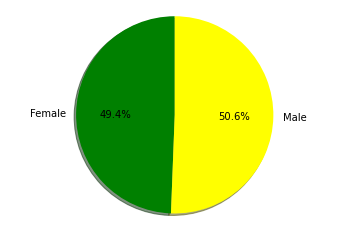

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
Gender = Mouse_df.groupby('Sex')
Count_Mice = Gender['Mouse ID'].count()
Treatment = Count_Mice.reset_index()["Sex"].to_list()
Colors = ["green","yellow"]
plt.pie(Count_Mice, labels = Treatment, colors = Colors, autopct = "%1.1f%%", shadow = True, startangle = 90)
plt.axis("equal")
plt.show()

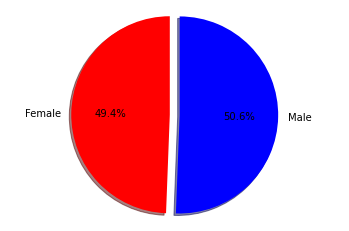

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
Colors = ["red","blue"]
Explode = (0.1,0)

plt.pie(Count_Mice, explode = Explode, labels = Treatment, colors = Colors,
        autopct = "%1.1f%%", shadow = True, startangle = 90)

plt.axis("equal")
plt.show()

## Quartiles, Outliers and Boxplots

In [14]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

Four_Regimes = Cleaned_Mouse_df[(Cleaned_Mouse_df["Drug Regimen"] == "Capomulin") | 
                                (Cleaned_Mouse_df["Drug Regimen"] == "Ramicane") | 
                                (Cleaned_Mouse_df["Drug Regimen"] == "Infubinol") | 
                                (Cleaned_Mouse_df["Drug Regimen"] == "Ceftamin")]

# Start by getting the last (greatest) timepoint for each mouse
Tumor_Volume_df = Four_Regimes.groupby(Four_Regimes["Mouse ID"]).agg({"Timepoint":["max"]})
Tumor_Volume_df.columns = ['Timepoint']
Tumor_Volume_df

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
Tumor_Volume_df = Tumor_Volume_df.reset_index()
Tumor_Volume_Final_df = pd.merge(Tumor_Volume_df, Cleaned_Mouse_df,
                        how = "left", on = ["Mouse ID", "Timepoint"])
Tumor_Volume_Final_df

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a275,45,Ceftamin,Female,20,28,62.999356,3
3,a411,45,Ramicane,Male,3,22,38.407618,1
4,a444,45,Ramicane,Female,10,25,43.047543,0
...,...,...,...,...,...,...,...,...
95,y769,45,Ceftamin,Female,6,27,68.594745,4
96,y793,45,Capomulin,Male,17,17,31.896238,2
97,y865,45,Ceftamin,Male,23,26,64.729837,3
98,z578,45,Ramicane,Male,11,16,30.638696,0


In [15]:
# Put treatments into a list for for loop (and later for plot labels)
Regime_list = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
Tumor_Volumes_list = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
for Drug in Regime_list:
    Volume_by_Drug = Tumor_Volume_Final_df['Tumor Volume (mm3)'].loc[Tumor_Volume_Final_df['Drug Regimen'] == Drug]   
    
    # add subset 
    Tumor_Volumes_list.append(Volume_by_Drug) 

    # Determine outliers using upper and lower bounds
    Quartiles = Volume_by_Drug.quantile([.25,.5,.75])
    Lower_Quartiles = Quartiles[0.25]
    Upper_Quartiles = Quartiles[0.75]
    IQR = Upper_Quartiles-Lower_Quartiles
    print(f'For {Drug}, IQR is {IQR}')
    Lower_Bound = Lower_Quartiles - (1.5 * IQR)
    Upper_Bound = Upper_Quartiles + (1.5 * IQR)
    print(f'For {Drug}, values below {Lower_Bound} could be outliers')
    print(f'For {Drug}, values above {Upper_Bound} could be outliers\n')

For Capomulin, IQR is 7.781863460000004
For Capomulin, values below 20.70456164999999 could be outliers
For Capomulin, values above 51.83201549 could be outliers

For Ramicane, IQR is 9.098536719999998
For Ramicane, values below 17.912664470000003 could be outliers
For Ramicane, values above 54.30681135 could be outliers

For Infubinol, IQR is 11.477135160000003
For Infubinol, values below 36.83290494999999 could be outliers
For Infubinol, values above 82.74144559000001 could be outliers

For Ceftamin, IQR is 15.577752179999997
For Ceftamin, values below 25.355449580000002 could be outliers
For Ceftamin, values above 87.66645829999999 could be outliers



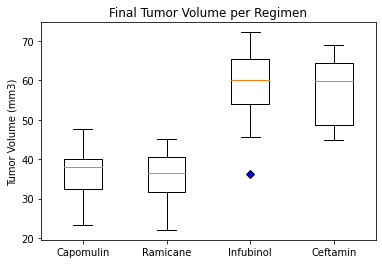

In [16]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
fig, ax = plt.subplots()
ax.set_title("Final Tumor Volume per Regimen")
ax.set_xticklabels(Regime_list)
ax.set_ylabel("Tumor Volume (mm3)")
ax.boxplot(Tumor_Volumes_list, flierprops = dict(markerfacecolor = "b", marker = "D"))
plt.show()

## Line and Scatter Plots

      Timepoint  Tumor Volume (mm3)
1452          0           45.000000
1453          5           45.597064
1454         10           46.059608
1455         15           46.539206


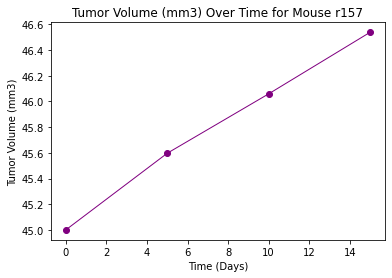

In [17]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
Capomulin_Mice = Cleaned_Mouse_df.set_index("Drug Regimen")
Capomulin_Mice_Tumor_Volume = Capomulin_Mice.loc["Capomulin", ["Mouse ID", "Tumor Volume (mm3)"]]

Selected_Capomulin_Mice = "r157"

Selected_Capomulin_Mice = Cleaned_Mouse_df.loc[Cleaned_Mouse_df["Mouse ID"] == Selected_Capomulin_Mice, ["Timepoint", "Tumor Volume (mm3)"]]

print(Selected_Capomulin_Mice)

plt.plot(Selected_Capomulin_Mice["Timepoint"], Selected_Capomulin_Mice["Tumor Volume (mm3)"], linewidth = 1, color = "purple", marker = "o")

plt.xlabel("Time (Days)")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Tumor Volume (mm3) Over Time for Mouse r157")
plt.show()


<ipython-input-18-c173a8426945>:4: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  Capomulin_Mice = Capomulin_Mice.groupby(["Mouse ID"])["Weight (g)", "Tumor Volume (mm3)"].mean()


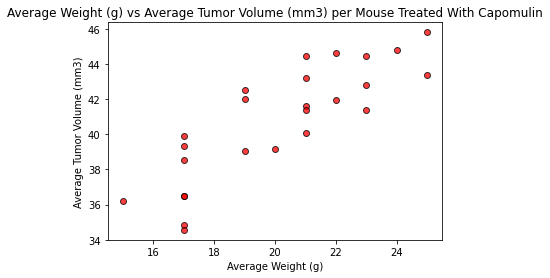

In [18]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
Capomulin_Mice = Cleaned_Mouse_df.set_index("Drug Regimen")
Capomulin_Mice = Capomulin_Mice.loc["Capomulin"]
Capomulin_Mice = Capomulin_Mice.groupby(["Mouse ID"])["Weight (g)", "Tumor Volume (mm3)"].mean()
Capomulin_Mice = Capomulin_Mice.rename(columns = {"Weight (g)": "Average Weight (g)",
                                                  "Tumor Volume (mm3)": "Average Tumor Volume (mm3)"})

x_values = Capomulin_Mice["Average Weight (g)"]
y_values = Capomulin_Mice["Average Tumor Volume (mm3)"]
plt.scatter(x_values, y_values, marker="o", facecolors="red", edgecolors="black", alpha=0.75)

plt.xlabel("Average Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.title("Average Weight (g) vs Average Tumor Volume (mm3) per Mouse Treated With Capomulin")
plt.show()

## Correlation and Regression

In [278]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
Correlation = round(st.pearsonr(x_values, y_values)[0], 2)
print(f"The correlation between a mouse's average weight (g) and average tumor volume (mm3) is on the Capomulin regimen is {Correlation}.")

The correlation between a mouse's average weight (g) and average tumor volume (mm3) that has been on the Capomulin regimen is 0.84.
